Olá, nesse notebook vamos observar se há ou não, diferença de impacto em modelos de rede neural quando tratamos os dados de diferentes formas.
- Os dados já foram tratados e usados para treinar um modelo mais robusto, 
- Minha intensão aqui é apenas obeservar o resultado de normalização e padronização
- Não vamos fazer mais nenhum tipo de tratamento em outliers, valores ausentes, etc.



# 📊 Tratamento Adequado para o Pré-Processamento de Dados

Utilizei uma base de **histórico de cobrança** para treinar um modelo de rede neural, com o objetivo de avaliar como diferentes técnicas de pré-processamento impactam o desempenho do modelo.

Treinei **três modelos** com a mesma arquitetura, variando apenas o tratamento dos dados:

## Importando dados

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [108]:
df_bruto = pd.read_csv('data/clientes.csv',sep=';')

df_bruto.isnull().sum()  # confirmando que não há valores ausentes
df_bruto.info()  # informações gerais do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10872 entries, 0 to 10871
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      10872 non-null  int64  
 1   F2      10872 non-null  int64  
 2   F3      10872 non-null  int64  
 3   F4      10872 non-null  int64  
 4   F5      10872 non-null  int64  
 5   F6      10872 non-null  int64  
 6   F7      10872 non-null  int64  
 7   F8      10872 non-null  int64  
 8   F9      10872 non-null  int64  
 9   F10     10872 non-null  int64  
 10  F11     10872 non-null  float64
 11  F12     10872 non-null  float64
 12  F13     10872 non-null  float64
 13  F14     10872 non-null  float64
 14  F15     10872 non-null  int64  
 15  F16     10872 non-null  int64  
 16  F17     10872 non-null  int64  
 17  TARGET  10872 non-null  int64  
dtypes: float64(4), int64(14)
memory usage: 1.5 MB


In [109]:
df_bruto.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,TARGET
count,10872.000000,10872.000000,10872.000000,10872.000000,10872.000000,10872.000000,10872.000000,10872.000000,10872.000000,10872.000000,1.087200e+04,10872.000000,10872.000000,1.087200e+04,10872.000000,10872.000000,10872.000000,10872.000000
mean,1.096210,0.294334,0.234915,0.470751,0.044702,0.024375,0.284308,0.277686,0.056659,0.312270,2.681072e+05,117.327547,6.828576,3.969685e+04,28.390728,0.006347,0.820456,0.500000
std,0.751864,0.455764,0.423965,0.499167,0.206658,0.154216,0.451105,0.447878,0.231201,0.463441,2.044698e+05,19.878056,1.810031,7.163124e+04,25.539442,0.079416,0.383825,0.500023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.050000e+02,0.000000,4.990000,1.000000e-01,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180730e+05,105.000000,5.990000,1.262068e+04,17.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.346575e+05,117.816818,5.990000,2.696510e+04,21.000000,0.000000,1.000000,0.500000
75%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.475020e+05,129.000000,6.990000,5.058278e+04,31.000000,0.000000,1.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.622248e+06,198.000000,11.990000,4.400000e+06,1040.000000,1.000000,1.000000,1.000000


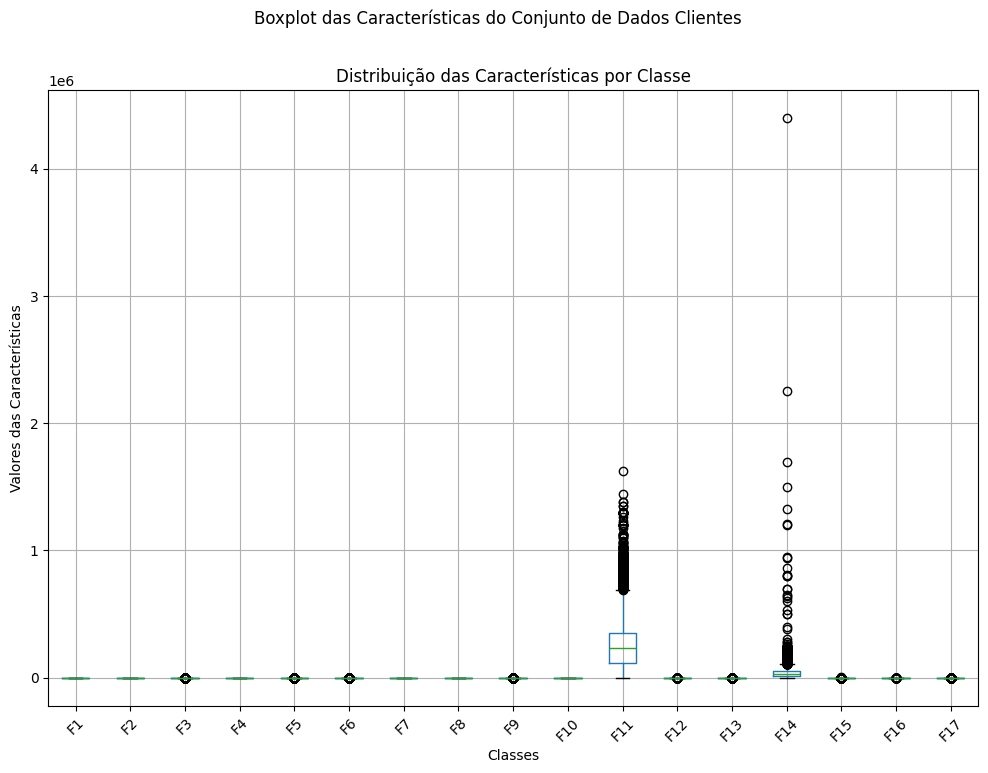

In [110]:
df_bruto.iloc[:, :-1].select_dtypes(include='number').boxplot(figsize=(12, 8))
plt.suptitle('Boxplot das Características do Conjunto de Dados Clientes')
plt.title('Distribuição das Características por Classe')
plt.xlabel('Classes')
plt.ylabel('Valores das Características')

plt.xticks(rotation=45)
plt.show()

## Aplicando MinMaxScaler e StandardScaler

In [ ]:

# importando as bibliotecas necessárias para normalização e padronização
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# aplicando a normalização
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_bruto.iloc[:, :-1]), columns=df_bruto.columns[:-1])
df_normalized['TARGET'] = df_bruto.iloc[:,-1:]

# aplicando a padronização
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df_bruto.iloc[:, :-1]), columns=df_bruto.columns[:-1])
df_standardized['TARGET'] = df_bruto.iloc[:,-1:]

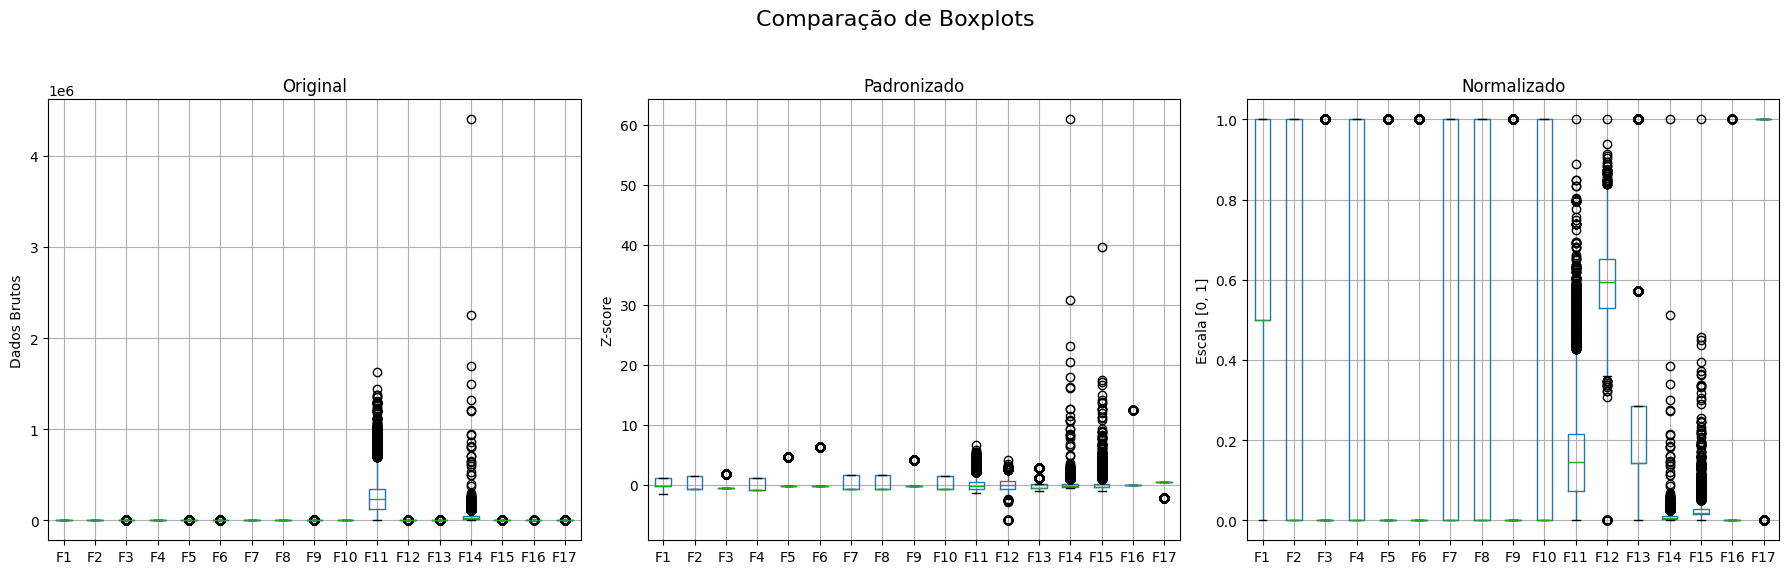

In [111]:
# vamos comparar os boxplots de cada conjunto de dados

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False) 

# Boxplot original
df_bruto.iloc[:, :-1].boxplot(ax=axes[0])  # Exclui a coluna target
axes[0].set_title('Original')

axes[0].set_ylabel('Dados Brutos')  # Para indicar a escala

# Boxplot padronizado
df_standardized.iloc[:, :-1].boxplot(ax=axes[1])
axes[1].set_title('Padronizado')

axes[1].set_ylabel('Z-score')  # Para indicar a escala

# Boxplot normalizado
df_normalized.iloc[:, :-1].boxplot(ax=axes[2])
axes[2].set_title('Normalizado')

axes[2].set_ylabel('Escala [0, 1]')

plt.suptitle('Comparação de Boxplots', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparacao_boxplots.png')
plt.show()


## Treinando modelo com dados Brutos

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1610
           1       1.00      0.00      0.01      1652

    accuracy                           0.50      3262
   macro avg       0.75      0.50      0.34      3262
weighted avg       0.75      0.50      0.33      3262

Matriz de Confusão:
[[1610    0]
 [1645    7]]
AUC-ROC: 0.5021186440677966


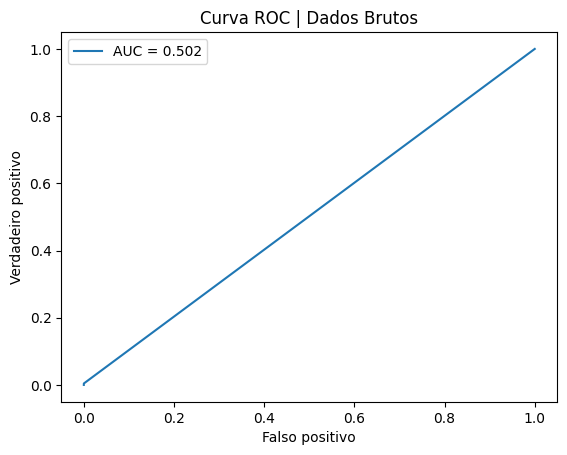

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout

x_train, x_test, y_train, y_test = train_test_split(df_bruto.iloc[:, :-1].values,df_bruto['TARGET'].values, test_size=0.3, random_state=42)


# Criando a rede neural

rn_model = Sequential()
# camada de entrada com o tamanhado da quantidade de variaveis em x_train
rn_model.add(Input(shape=(x_train.shape[1],)))  
# uma cada densa
rn_model.add(Dense(64))
# Camadas ocultas com Dropout
rn_model.add(Dense(128, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout com taxa de 30%
rn_model.add(Dense(64, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout novamente
rn_model.add(Dense(32, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout mais uma vez

# Camada de saída 
rn_model.add(Dense(1, activation='sigmoid'))  # Sigmoid para problemas binários

rn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# coloquei verbose 0 para não printar os treinamentos
rn_model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test),verbose=0)

# Fazendo previsões em numeros flutuantes
probs = rn_model.predict(x_test).flatten() # o modelo original precisa ser com numeros flutuantes

# convertendo em binário 
y_pred = (probs >= 0.5).astype(int)

# Avaliando o modelo
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))



auc = roc_auc_score(y_test, probs)
print("AUC-ROC:", auc)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.xlabel("Falso positivo")
plt.ylabel("Verdadeiro positivo")
plt.title("Curva ROC | Dados Brutos")
plt.legend()
plt.show()

## Treinando modelo com dados Padronizados

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1610
           1       0.82      0.85      0.84      1652

    accuracy                           0.83      3262
   macro avg       0.83      0.83      0.83      3262
weighted avg       0.83      0.83      0.83      3262

Matriz de Confusão:
[[1309  301]
 [ 244 1408]]
AUC-ROC: 0.9136023716782218


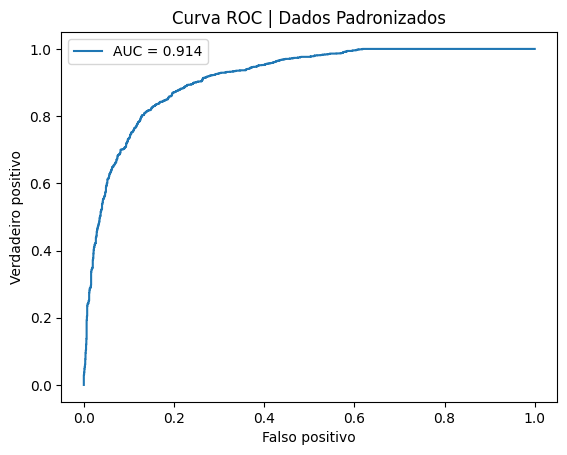

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(df_standardized.iloc[:, :-1].values,df_standardized['TARGET'].values, test_size=0.3, random_state=42)


# Camada de entrada
rn_model = Sequential()
# camada de entrada com o tamanhado da quantidade de variaveis em x_train
rn_model.add(Input(shape=(x_train.shape[1],)))  
# uma cada densa
rn_model.add(Dense(64))

# Camadas ocultas com Dropout
rn_model.add(Dense(128, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout com taxa de 30%
rn_model.add(Dense(64, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout novamente
rn_model.add(Dense(32, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout mais uma vez

# Camada de saída 
rn_model.add(Dense(1, activation='sigmoid'))  # Sigmoid para problemas binários

rn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# coloquei verbose 0 para não printar os treinamentos
rn_model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test),verbose=0)

# Fazendo previsões em numeros flutuantes
probs = rn_model.predict(x_test).flatten() # o modelo original precisa ser com numeros flutuantes

# convertendo em binário 
y_pred = (probs >= 0.5).astype(int)

# Avaliando o modelo
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))



auc = roc_auc_score(y_test, probs)
print("AUC-ROC:", auc)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.xlabel("Falso positivo")
plt.ylabel("Verdadeiro positivo")
plt.title("Curva ROC | Dados Padronizados")
plt.legend()
plt.show()

## Treinando modelo com dados Normalizados

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1610
           1       0.76      0.87      0.81      1652

    accuracy                           0.80      3262
   macro avg       0.80      0.79      0.79      3262
weighted avg       0.80      0.80      0.79      3262

Matriz de Confusão:
[[1167  443]
 [ 223 1429]]
AUC-ROC: 0.8808451641526176


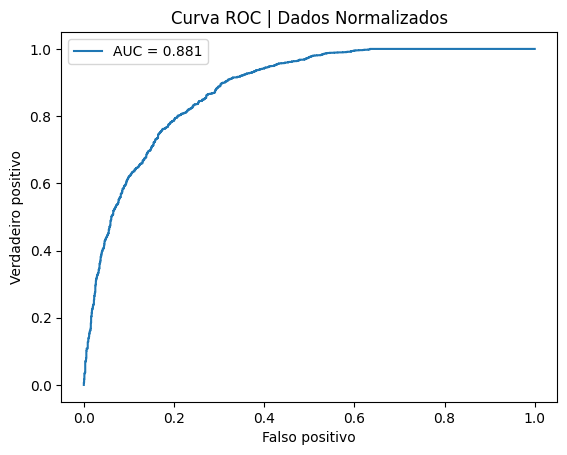

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(df_normalized.iloc[:, :-1].values,df_normalized['TARGET'].values, test_size=0.3, random_state=42)



# Camada de entrada
rn_model = Sequential()
# camada de entrada com o tamanhado da quantidade de variaveis em x_train
rn_model.add(Input(shape=(x_train.shape[1],)))  
# uma cada densa
rn_model.add(Dense(64))

# Camadas ocultas com Dropout
rn_model.add(Dense(128, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout com taxa de 30%
rn_model.add(Dense(64, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout novamente
rn_model.add(Dense(32, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout mais uma vez

# Camada de saída 
rn_model.add(Dense(1, activation='sigmoid'))  # Sigmoid para problemas binários

rn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# coloquei verbose 0 para não printar os treinamentos
rn_model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test),verbose=0)

# Fazendo previsões em numeros flutuantes
probs = rn_model.predict(x_test).flatten() # o modelo original precisa ser com numeros flutuantes

# convertendo em binário 
y_pred = (probs >= 0.5).astype(int)

# Avaliando o modelo
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))



auc = roc_auc_score(y_test, probs)
print("AUC-ROC:", auc)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.xlabel("Falso positivo")
plt.ylabel("Verdadeiro positivo")
plt.title("Curva ROC | Dados Normalizados")
plt.legend()
plt.show()


#
---

## 🔴 Modelo 1: Dados Brutos (Sem Tratamento)

- As variáveis possuíam **escalas desproporcionais**, com colunas variando de **0 a 1** e outras alcançando até **600.000**.
- O modelo **não conseguiu aprender os padrões corretamente**, prevendo sempre a **classe 1**.
- Resultado semelhante a uma escolha aleatória, com:
  - **AUC**: `0.502`

---

## 🟡 Modelo 2: Dados Normalizados (MinMaxScaler)

- Foi aplicada **normalização Min-Max**, convertendo todos os valores para a escala **[0, 1]**, preservando proporções e distâncias relativas.
- Desempenho consideravelmente melhor:
  - **Acurácia**: `76%`
  - **AUC**: `0.881`

---

## 🟢 Modelo 3: Dados Padronizados (Z-Score)

- Aplicada **padronização (Z-score)**, com média 0 e desvio padrão 1.
- Obteve o **melhor desempenho geral**:
  - **Acurácia**: `82%`
  - **AUC**: `0.914`

---

## ✅ Conclusões

- O pré-processamento dos dados é **essencial** para o bom desempenho de redes neurais.
- Dados brutos comprometem severamente a capacidade do modelo de aprender.
- A **padronização** foi superior à normalização neste caso, possivelmente por ser mais robusta a **outliers**.
- A escolha da técnica de escalonamento pode ser decisiva entre um modelo **ineficiente** e um modelo **efetivo**.

---

<sub>Este experimento teve como objetivo demonstrar, de forma prática, a importância do tratamento adequado dos dados para algoritmos de machine learning.</sub>
